# Lecture 18 – Data 100, Spring 2024

Data 100, Spring 2024

[Acknowledgments Page](https://ds100.org/sp24/acks/)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

<br/><br/>

---

# Which would you pick?

* $\large Y_A = 10 X_1 + 10 X_2 $
* $\large Y_B = \sum\limits_{i=1}^{20} X_i$
* $\large Y_C = 20 X_1$

First let's construct the probability distribution for a single coin. This will let us flip 20 IID coins later.

In [2]:
# First construct probability distribution for a single fair coin
p = 0.5
coin_df = pd.DataFrame({"x": [1, 0], # [Heads, Tails]
                        "P(X = x)": [p, 1 - p]})
coin_df

,x,P(X = x)
0,1,0.5
1,0,0.5


## Choice A:
$\large Y_A = 10 X_1 + 10 X_2 $

A couple ways to sample:

In [3]:
coin_df.sample(10, weights="P(X = x)", replace=True)["x"]

1    0
1    0
0    1
1    0
1    0
1    0
1    0
1    0
0    1
1    0
Name: x, dtype: int64

In [4]:
N = 10000

np.random.rand(N,2) < p

array([[False,  True],
       [False,  True],
       [ True,  True],
       ...,
       [False,  True],
       [ True,  True],
       [ True,  True]])

In [5]:
sim_flips = pd.DataFrame(
    {"Choice A": np.sum((np.random.rand(N,2) < p) * 10, axis=1)})
sim_flips

,Choice A
0,20
1,10
2,20
3,10
4,10
...,...
9995,20
9996,10
9997,10
9998,0


## Choice B:

$\large Y_B = \sum\limits_{i=1}^{20} X_i$

In [6]:
sim_flips["Choice B"] = np.sum((np.random.rand(N,20) < p), axis=1)
sim_flips

,Choice A,Choice B
0,20,10
1,10,11
2,20,9
3,10,10
4,10,8
...,...,...
9995,20,9
9996,10,8
9997,10,7
9998,0,10


## Choice C:

$\large Y_C = 20 X_1$

In [7]:
sim_flips["Choice C"] = 20 * (np.random.rand(N,1) < p) 
sim_flips

,Choice A,Choice B,Choice C
0,20,10,20
1,10,11,20
2,20,9,20
3,10,10,20
4,10,8,20
...,...,...,...
9995,20,9,20
9996,10,8,0
9997,10,7,0
9998,0,10,0


<br/>
If you're curious as to what these distributions look like, I've simulated some populations:

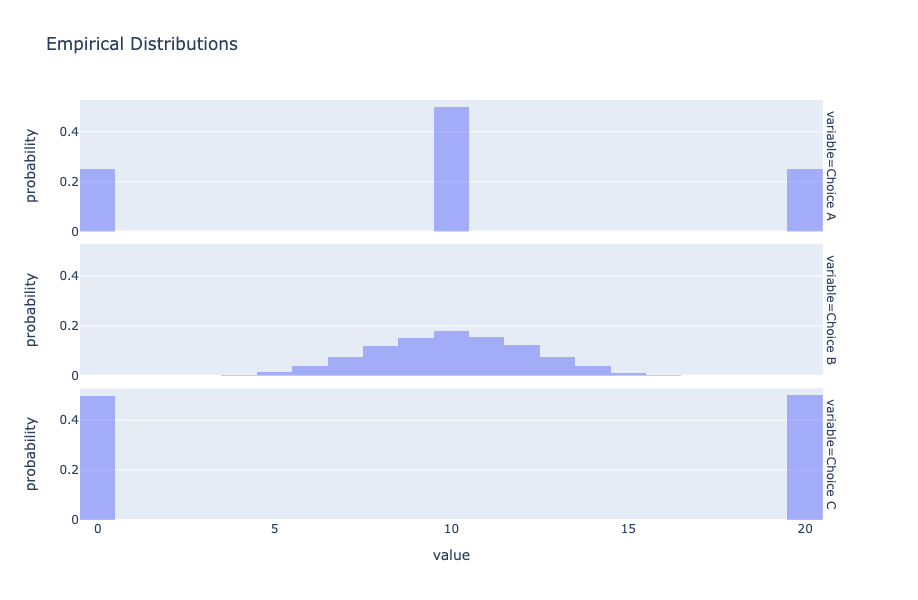

In [8]:
px.histogram(sim_flips.melt(), x="value", facet_row="variable", 
             barmode="overlay", histnorm="probability",
             title="Empirical Distributions",
             width=600, height=600)

In [9]:
pd.DataFrame([
    sim_flips.mean().rename("Simulated Mean"),
    sim_flips.var().rename("Simulated Var"),
    np.sqrt(sim_flips.var()).rename("Siumulated SD")
])

,Choice A,Choice B,Choice C
Simulated Mean,10.021000,10.008700,10.022000
Simulated Var,50.234582,4.958720,100.009517
Siumulated SD,7.087636,2.226818,10.000476
